In [95]:
%matplotlib inline
import numpy as np
from scipy.spatial.distance import squareform, pdist
from scipy.stats import rankdata
import statsmodels.api as sm
from statsmodels.stats.mediation import Mediation
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [96]:
facesDM = np.array([ 1.21753158,  1.31317238,  0.64635461,  0.98343632,  0.56278148,
        0.64324352,  1.52952733,  0.64504814,  0.68114085,  0.55520351,
        0.66112095,  0.78872807,  0.59898026,  0.28311452,  0.54268434,
        0.71671046,  1.85822191,  1.83269688,  0.3492268 ,  1.34368911,
        1.87857093,  1.26174058,  1.0451036 ,  1.72603678,  1.60558018,
        0.9490865 ,  0.6128216 ,  1.77141231,  1.71119512,  0.26518254,
        1.4220777 ,  1.70160866,  1.23399264,  1.16083842,  1.40473511,
        1.40969468,  0.74950845,  1.18963541,  1.22538387,  1.07539344,
        0.69819691,  1.36566083,  0.72343172,  0.49067589,  1.45176613,
        1.22122022,  1.21100786,  1.07548647,  0.85282069,  0.60892907,
        1.15420642,  0.60363327,  0.50145189,  1.02753122,  0.78231687,
        0.14304965,  1.81095059,  0.50217337,  0.11274126,  0.57844277,
        0.76209631,  0.39190796,  0.38796024,  1.68161647,  0.42101262,
        0.14265297,  0.4774339 ,  0.67313008,  0.27578244,  0.24367529,
        1.53303545,  1.69128515,  1.42566467,  1.30535986,  1.32850197,
        1.43391105,  0.58301088,  0.22318109,  0.13404558,  0.58568928,
        0.3519636 ,  0.66194617,  0.85085153,  0.27367298,  0.36428862,
        0.18226417,  0.6082103 ,  0.27929241,  0.79690548,  0.49378823,
        0.27158906])
        
objectiveDM = np.array([ 1.28231319,  1.41151667,  0.64271264,  1.17169612,  0.62923826,
        0.96801538,  1.3341667 ,  1.02178614,  0.65399163,  0.55989133,
        0.87029935,  0.84623946,  0.79500016,  0.33430164,  1.05131884,
        1.23634074,  1.33549788,  1.48956163,  0.43136818,  1.3419329 ,
        1.32000128,  1.21375323,  1.22876635,  1.14627593,  1.43238124,
        1.2788665 ,  1.08856012,  1.37075275,  1.13378328,  0.30026093,
        1.17514736,  1.36706333,  1.26396796,  1.28707951,  0.87323977,
        1.3332664 ,  1.11381524,  0.6151061 ,  1.32653187,  1.39298351,
        1.00537549,  0.47906541,  0.69857129,  0.69648039,  1.09898923,
        0.90702458,  1.23410834,  0.77490049,  1.19084606,  0.43481476,
        1.14497397,  0.9002914 ,  0.57942871,  0.96717899,  0.9837917 ,
        0.81726821,  1.48417795,  0.8974166 ,  0.36432533,  0.84452384,
        0.8916952 ,  0.78061864,  0.51354376,  1.13137973,  0.62722845,
        0.8047268 ,  1.05718856,  0.97795359,  0.49960186,  0.4965393 ,
        1.29526537,  1.46419847,  1.21835495,  1.41685105,  0.95704342,
        1.38260799,  0.8566416 ,  0.85433487,  0.51358393,  0.76739764,
        0.72934531,  0.90922769,  0.79106587,  0.742898  ,  0.47322516,
        0.85355248,  0.90478654,  0.94689289,  1.04106906,  0.9135715 ,
        0.56093075])
        
subjectiveDM = np.array([3.26635514,2.742990654,5.121495327,2.331775701,5.210280374,4.523364486,
                         2.700934579,4.130841121,5.079439252,4.448598131,4.11682243,4.088785047,
                         4.457943925,4.855140187,4.925233645,3.887850467,1.953271028,2.635514019,
                         5.060747664,3.457943925,2.186915888,3.780373832,3.364485981,2.406542056,
                         3.009345794,3.196261682,5.588785047,3.14953271,3.626168224,5.73364486,
                         3.827102804,3.654205607,4.317757009,3.593457944,4.154205607,3.738317757,
                         3.257009346,4.08411215,3.747663551,2.920560748,4.920560748,4.093457944,
                         4.719626168,5.070093458,3.602803738,4.411214953,3.822429907,4.079439252,
                         4.747663551,4.757009346,3.827102804,4.887850467,5.168224299,4.401869159,
                         4.46728972,5.327102804,2.177570093,4.556074766,6.037383178,4.453271028,
                         4.490654206,5.065420561,4.995327103,3.429906542,5.369158879,5.682242991,
                         4.630841121,5.11682243,5.275700935,5.518691589,3.476635514,3.289719626,
                         4.299065421,3.257009346,4.355140187,3.714953271,4.794392523,5.037383178,
                         5.728971963,4.560747664,5.425233645,4.654205607,4.574766355,5.747663551,
                         5.439252336,5.336448598,4.504672897,4.864485981,4.275700935,5.397196262,5.23364486])

fso = pd.DataFrame([ 1 - facesDM, subjectiveDM, 1 - objectiveDM ] ).transpose() 
fso.columns = ['Faces','Subjective','Objective']

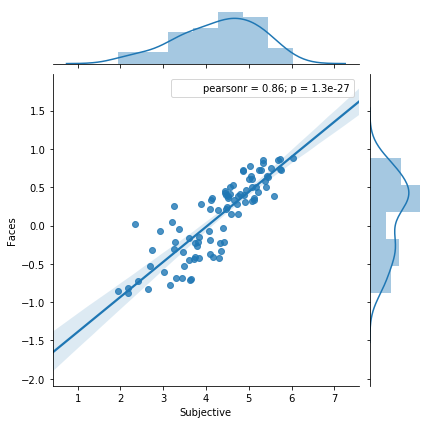

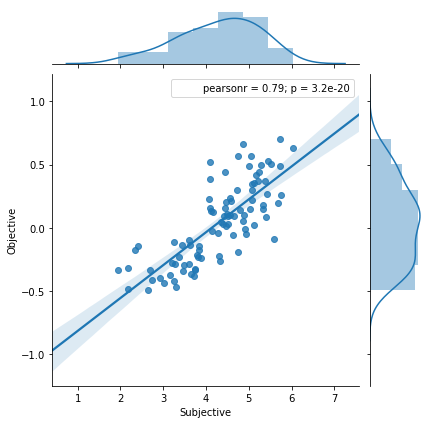

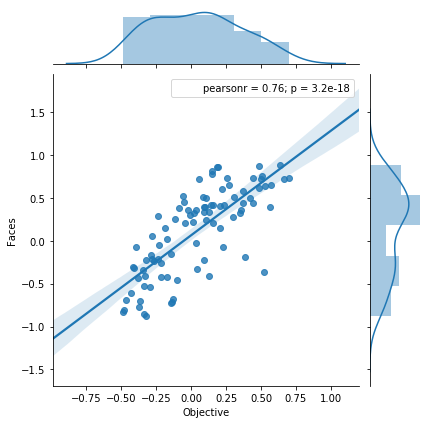

In [97]:
sns.jointplot("Subjective", "Faces", data=fso, kind="reg")
sns.jointplot("Subjective", "Objective", data=fso, kind="reg")
sns.jointplot("Objective", "Faces", data=fso, kind="reg")

In [99]:
outcome_model = sm.GLM.from_formula("Faces ~ Subjective + Objective",
                                        fso, family=sm.families.Gaussian())
mediator_model = sm.OLS.from_formula("Subjective ~ Objective", fso)
med = Mediation(outcome_model, mediator_model, "Objective", "Subjective")
med_result = med.fit(n_rep=1000)
print(med_result.summary())
# ACME = indirect effect; ADE = direct effect

                          Estimate  Lower CI bound  Upper CI bound  P-value
ACME (control)            0.866034        0.616116        1.144735    0.000
ACME (treated)            0.866034        0.616116        1.144735    0.000
ADE (control)             0.349753        0.078184        0.625325    0.006
ADE (treated)             0.349753        0.078184        0.625325    0.006
Total effect              1.215786        0.997877        1.437631    0.000
Prop. mediated (control)  0.710278        0.532740        0.932920    0.000
Prop. mediated (treated)  0.710278        0.532740        0.932920    0.000
ACME (average)            0.866034        0.616116        1.144735    0.000
ADE (average)             0.349753        0.078184        0.625325    0.006
Prop. mediated (average)  0.710278        0.532740        0.932920    0.000
